<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/mglearn%E8%AA%AA%E6%98%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install mglearn

## ⬇︎一維線性函式公式

`ŷ = w[0] * x[0] + b`

- x[0]:是feature(特徵)  
- ŷ:是label(標籤)

In [2]:
#取得x[0]和ŷ的資料
#使用pandas顯示
import mglearn
import pandas as pd

X, y = mglearn.datasets.make_wave(n_samples=120)#建立120個的點
#維度
print("x形狀",X.shape)
print("y形狀",y.shape)
#長度
print('長度:',len(X), len(y))
# 建立一個DataFrame顯示資料
Xy_df = pd.DataFrame(X, columns=['特徵(feature)'])
Xy_df['label標籤'] = y
display(Xy_df)

x形狀 (120, 1)
y形狀 (120,)
長度: 120 120


,特徵(feature),label標籤
0,-0.752759,-0.792499
1,2.704286,0.696250
2,1.391964,0.171994
3,0.591951,-0.086357
4,-2.063888,-1.344108
...,...,...
115,2.228764,1.615243
116,1.822032,1.590606
117,-1.880580,0.513325
118,2.355354,1.464803


### ⬇︎目視檢查是否為線性關係
mglearn.datasets.make_wave（或任何資料集）中的 `X 和 y 資料是否呈現線性關係`：   
- 使用`散佈圖(Scatter Plot)`進行目視檢查：
- 如果這些點緊密聚集在一條直線周圍，則表示存在線性關係。與直線的明顯偏差表示存在非線性關係。

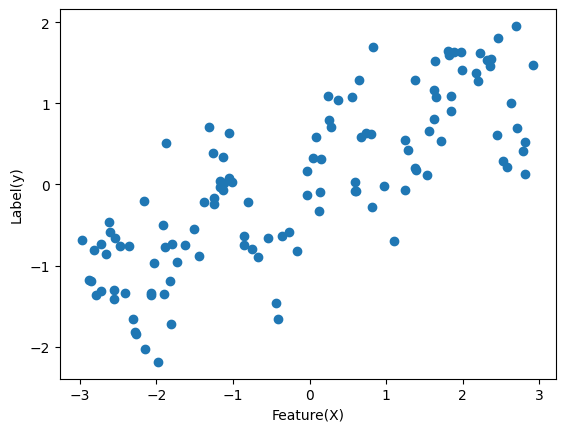

In [3]:
import matplotlib.pyplot as plt
#print(X[:,0]) #shape(120,)
plt.scatter(X[:,0], y)
plt.xlabel("Feature(X)")
plt.ylabel("Label(y)")
plt.show()

### ⬇︎使用相關係數檢查
mglearn.datasets.make_wave（或任何資料集）中的 X 和 y 資料是否呈現線性關係：   
- 使用`相關係數(Correlation Coefficient)`進行檢查：
- 計算 X 和 y 之間的皮爾遜相關係數(Pearson correlation coefficient),此係數衡量兩個變數之間的線性關聯。接近 +1 或 -1 的值表示強線性關係（分別為正或負），而接近 0 的值表示弱線性關係或不存在線性關係。

In [4]:
import numpy as np

correction = np.corrcoef(X[:,0],y)[0, 1]
print(f"X,y的線性關係值:{correction}") #高線性關係

X,y的線性關係值:0.7914141456801173


### ⬇︎線性模型訓練後可以使用R平方檢查
mglearn.datasets.make_wave（或任何資料集）中的 X 和 y 資料是否呈現線性關係：   
- 線性迴歸和 R 平方：  
- 對資料擬合線性迴歸模型並檢查 R 平方分數。 R 平方表示 X 解釋的 y 中的變異數比例。較高的 R 平方值（接近 1）表示線性模型擬合度良好
- 例如，如果R平方 = 0.75，表示模型可以解釋75%的數據變異性

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples=120)
#X = X.reshape(-1,1) #改變維度,-1是個符號,代表線數120元素資料,1是代表第2維使用的size是1
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
print(f'R-squared:{r_squared}')

R-squared:0.6263363499825908


### ⬇︎ 使用mglearn的工具,快速表示的分散(scatter plot),並且畫出相關的線圖(line plot)


w[0]: 0.393906  b: -0.031804


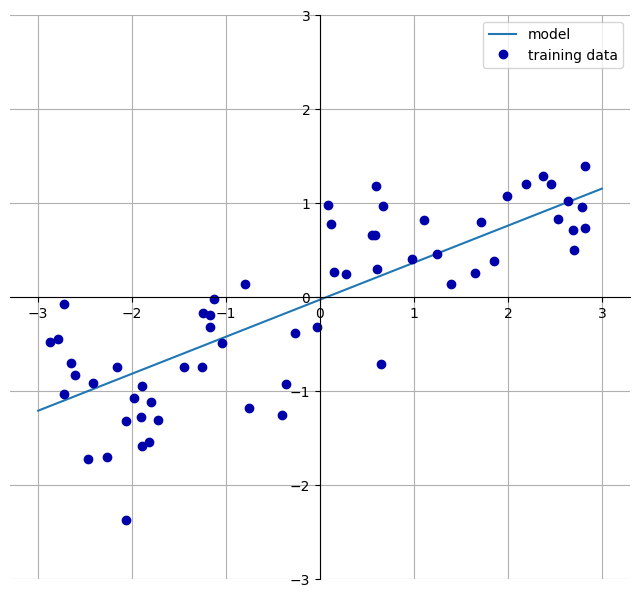

In [6]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_linear_regression_wave()


### 以下程式為建立線性模型
- 計算(w),coefficient
- 計算(b),intercept


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train) #建立線性模型和訓練模型

# 'slope(w)中文稱為斜率',也稱為(權重)或(coefficients係數)
# 'intercept(b)'中文稱為截距或偏移

print("斜率(權重):{}".format(lr.coef_[0])) #由於只有一個特徵,所以只有一個權重
print("截距(偏移):{}".format(lr.intercept_))

斜率(權重):0.3939055511673396
截距(偏移):-0.03180434302675973


### 下面是查看訓練集和測試集的效能

In [8]:
print("訓練集得分:{}".format(lr.score(X_train, y_train)))
print("測試集得分:{}".format(lr.score(X_test, y_test)))


訓練集得分:0.6700890315075756
測試集得分:0.6593368596863701


⬆︎R2 約為 0.66 並不是很好，但我們可以看到訓練和測試集上的分數非常接近。這意味著我們可能是欠擬合，而不是過度擬合。對於這個一維資料集，過度擬合的危險很小，因為模型非常簡單（或受到限制）。然而，對於更高維度的資料集（即具有大量特徵的資料集），線性模型變得更加強大，過度擬合的可能性更高。

## ⬇︎解決underfitting,使用比較多的feature
讓我們看看 LinearRegression 在更複雜的資料集（例如波士頓住房資料集）上的表現。請記住，該資料集有 506個樣本和104個特徵。首先，我們載入資料集並將其分成訓練集和測試集。然後我們建立線性迴歸模型

In [9]:
X, y= mglearn.datasets.load_extended_boston()
display(X.shape) #506筆資料,104個特徵
display(y.shape) #506筆資料,1個標籤

(506, 104)

(506,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 104), (127, 104), (379,), (127,))

In [11]:
#training set score=0.95,但test set scores:0.61,差很多,所以這是overfitting
lr = LinearRegression().fit(X_train, y_train)
print("訓練集R²:{:.2f}".format(lr.score(X_train, y_train)))
print("測試集R²:{:.2f}".format(lr.score(X_test, y_test)))

訓練集R²:0.95
測試集R²:0.61


### ⬆︎訓練集R²很高分,訓練集和測試集分數差距大
然後我們建立線性迴歸模型，訓練集和測試集上的表現之間的差異,很明顯過度擬合的跡象，因此我們應該嘗試找到一個`可以控制複雜性的模型`。`嶺迴歸(Ridge Regression)`是標準線性迴歸最常用的替代之一，

### ⬇︎Ridge regression(嶺迴師)
`嶺迴歸`也是一種線性回歸模型，因此它用來進行預測的公式與普通的最小平方相同. 不過，在嶺迴歸中，係數 (w) 的選擇不僅是為了能很好地預測訓練資料，也必符合額外的限制。我們也希望係數(coefficient)的大小越小越好,換句話說，所有特徵(w)都應該接近零。直觀地說，這意味著每個特徵對結果的影響應該盡可能小（這意味著斜率很小），同時仍然可以很好地進行預測。這個約束就是所謂的`正規化(regularization)`的一個例子。`正則化(regularization)`意味著明確限制模型以`避免過度擬合`。嶺迴歸所使用的特定類型稱為`L2正規化`。

嶺迴歸在 linear_model.Ridge 中實作

In [12]:
#由於LinearRegression,是沒有參數(parameter)可以控制
#改用Ridge regression

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("訓練集R²:{:.2f}".format(ridge.score(X_train, y_train)))
print("測試集R²:{:.2f}".format(ridge.score(X_test, y_test)))

訓練集R²:0.89
測試集R²:0.75


⬆︎如你所見，Ridge 的訓練集得分低於線性迴歸，而測試集得分較高。這與我們的預期一致。使用線性迴歸，我們過度擬合了數據。Ridge 是一種更受限的模型，因此我們不太可能過度擬合。模型複雜度較低意味著在訓練集上的表現較差，但`泛化能力(generalization)較好`。由於我們只對泛化性能感興趣，因此我們應該選擇 Ridge 模型而不是 LinearRegression 模型。

⬇︎Ridge 模型在模型的簡單性（接近零係數）與其在訓練集上的表現之間進行了權衡。模型對簡單性與訓練集表現的重視程度可以透過以下方式指定：用 alpha 參數。在前面的例子中，我們使用了預設參數alpha=1.0。但沒有理由認為這會為我們帶來最好的權衡。alpha 的最佳設定取決於我們使用的特定資料集。增加 alpha 會迫使係數更接近零，這會降低訓練集的效能，但可能有助於`泛化generalization`。

In [13]:
#增加alpha參數,會迫使係數更接近零,這會降低訓練集的效能,但可能有助於泛化
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("訓練集R²:{:.2f}".format(ridge10.score(X_train, y_train)))
print("測試集R²:{:.2f}".format(ridge10.score(X_test, y_test)))

訓練集R²:0.79
測試集R²:0.64


### 降低 alpha  
降低 alpha 可以使係數受到的限制更少，對於非常小的 alpha 值，係數幾乎不受任何限制，我們最終得到一個類似線性迴歸的模型：

In [14]:
#減少alpha
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("訓練集R²:{:.2f}".format(ridge01.score(X_train, y_train)))
print("測試集R²:{:.2f}".format(ridge01.score(X_test, y_test)))

訓練集R²:0.93
測試集R²:0.77


⬆︎這裡，alpha=0.1 似乎運作良好。我們可以嘗試進一步降低 alpha提高泛化能力。

### ⬆︎觀察alpha參數值,產生的coefficient值,alpha愈高,愈接近0
現在，請注意參數 alpha 對應於模型複雜度. 我們還可以透過檢查具有不同 alpha 值的模型的 coef_ 屬性來更定性地了解 alpha 參數如何改變模型。`較高的 alpha 值表示模型受到的限制更多，因此我們預計當 alpha 值較高時，coef_ 的條目的幅度會比當 alpha 值較低時更小。

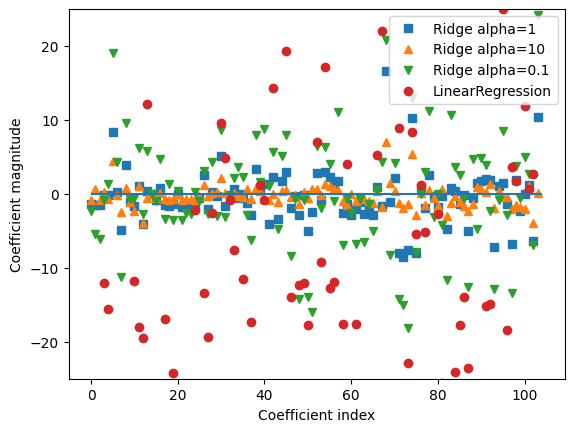

In [15]:
#比較具有不同 alpha 值的嶺迴歸和線性迴歸的係數(coefficient)振幅
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


⬆︎這裡，x 軸列舉了 coef_ 的條目：x=0 表示與第一個特徵相關的係數，x=1 表示與第二個特徵相關的係數，依此類推,最多 x=100。

y 軸顯示對應係數值的數值。

這裡的主要要點是，對於 alpha=10，係數大多在 -3 和 3 之間。

當 alpha=1 時，Ridge 模型的係數稍大。

對應於 alpha=0.1 的點具有更大的幅度，並且許多與沒有任何正則化的線性回歸（即 alpha=0）相對應的點都太大了，以至於超出了圖表的範圍。

### ⬇︎學習曲線
理解正規化影響的另一種方法是固定 alpha 值但改變可用的訓練資料量。

我們對波士頓住房數據集進行了子採樣，並在不斷增加的子集上評估了 LinearRegression 和 Ridge(alpha=1)（圖表顯示了`模型性能隨數據集的變化尺寸稱為學習曲線`）：

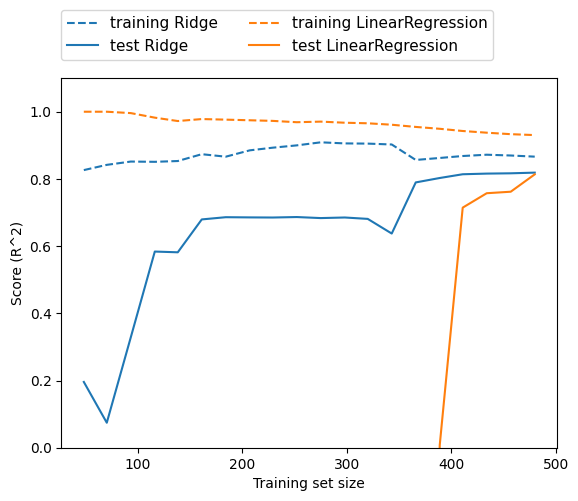

In [16]:
mglearn.plots.plot_ridge_n_samples()

## lasso regression

⬇︎正則化線性迴歸的 Ridge 的替代方案是 Lasso.與嶺迴歸一樣，使用套索也將係數限制為接近零，但方式略有不同，稱為 L1 正規化。L1 正則化的結果是，當使用 lasso 時，有些係數正好為零。`這意味著某些特徵被模型完全忽略了`。`這可以看作是自動特徵選擇的一種形式。`讓某些係數正好為零通常會使模型更易於解釋，並且可以`揭示模型的最重要特徵`

In [21]:
#一樣使用波士頓住房資料集

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("訓練集得分:{:.2f}".format(lasso.score(X_train, y_train)))
print("測試集得分:{:.2f}".format(lasso.score(X_test, y_test)))
print("使用的特徵數量:{}".format(np.sum(lasso.coef_ != 0)))
#alpha=1,結果很差,只有使用4個features,這是underfitting

訓練集得分:0.29
測試集得分:0.21
使用的特徵數量:4


⬆︎如你所見，Lasso 在訓練和測試集上的表現都相當糟糕。這表明我們`擬合不足underfitting`，我們發現它只使用了 104 個特徵中的 4 個。

⬇︎與 Ridge 類似，Lasso 也有一個正規化參數 alpha，它控制係數向零推的強度。在前面的例子中，我們使用了預設值 alpha=1.0。為了減少欠擬合，我們嘗試降低 alpha。當我們這樣做時，我們還需要增加 max_iter 的預設值（要運行的最大迭代次數）：

In [22]:
#我們增加max_iter的預設值(要運行的最大迭代次數)
#減少alpha,預設是1.0,我們改成0.001
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("訓練集得分:{:.2f}".format(lasso001.score(X_train, y_train)))
print("測試集得分:{:.2f}".format(lasso001.score(X_test, y_test)))
print("使用的特徵數量:{}".format(np.sum(lasso001.coef_ != 0)))

訓練集得分:0.94
測試集得分:0.74
使用的特徵數量:67


⬆︎較低的 alpha 值使我們能夠擬合更複雜的模型，從而在訓練和測試資料上表現得更好。性能比使用 Ridge 略好一些，而且我們
僅使用 104 個特徵中的 33 個。這使得該模型可能更容易理解。

⬇︎然而，如果我們將 alpha 設定得太低，我們再次消除正則化的影響並最終導致過度擬合，其結果類似於 LinearRegression：

In [ ]:
#alpha太小,結果就像LinearRegression

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("訓練集得分:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("測試集得分:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("使用的特徵數量:{}".format(np.sum(lasso00001.coef_ != 0)))

Training set score:0.95
Test set score:0.64
Number of features used:96


⬇︎再次，我們可以繪製不同模型的係數。

Text(0, 0.5, 'Coefficient magnitude')

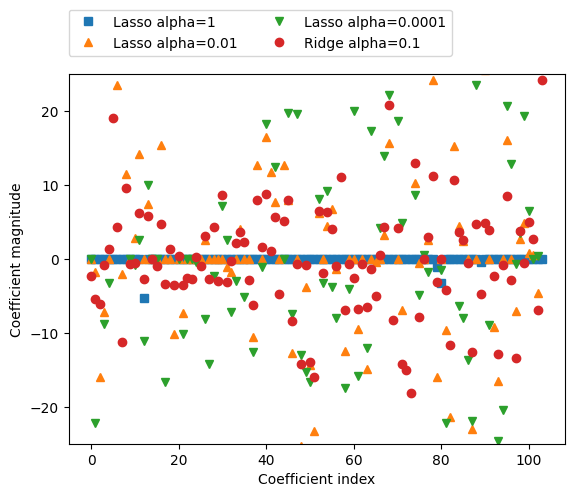

In [23]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

⬆︎對於 alpha=1，我們不僅看到大多數係數為零（我們已經知道），而且其餘係數的幅度也很小。將 alpha 減小到 0.01，我們得到了綠點所示的解，這會導致大多數特徵恰好為零。使用 alpha=0.00001，我們得到一個非常不規則的模型，其中大多數係數非零且幅度很大。為了進行比較，最佳的 Ridge 解決方案以青色顯示。alpha=0.1 的 Ridge 模型具有與 alpha=0.01 的 Lasso 模型相似的預測性能，但使用 Ridge，所有係數都非零。